# 2019年度クラスター分析課題の実技テストF2

## 氏名：LUO Yiming，学生番号：2600170541-4

当実技テストの[データファイル](https://www.dropbox.com/s/as8fw69zucwpwvj/ca_data_f2.csv?dl=0)のデータに対して以下の２つの問いへ回答するために，クラスター分析を実施せよ．<br>
問１：当データにおけるクラスタ数を教えよ．<br>
問２：個体0～個体9のうち，個体0と同じクラスタに属する個体をすべて列挙せよ．<br>
ただし，分析には必ず
    1. pandas.DataFrame.plot.scatterによる散布図のプロット
    2．scipy.cluster.hierarchy.dendrogramによるデンドグラムのプロット
    3．scipy.cluster.hierarchy.fclusterによるクラスタの抽出
    4．sklearn.decomposition.PCAによる主成分1と2の抽出，主成分1と2空間上の散布図のプロット，及び散布図における各クラスタの可視化（彩色）
を数パターン$^*$で試みよ．CodeセルまたはMarkdownセルを必要に応じて追加せよ．

$^*$ヒント：scipy.cluster.hierarchy.linkageで用いられる手法やscipy.cluster.hierarchy.fclusterにおける抽出条件などをうまく設定すれば，このデータについては主成分1と2空間上の散布図にクラスタの領域が色でハッキリと区別（異なる色をもつ個体が混合しない）できるようになる．前記の２つの問いへ回答はこのパターンでの結果を参考にせよ．

manaba+Rには，CC402のPCの作業フォルダ（`C:\Users\アカウント名\Downloads`）にある，各セルの実行結果が表示されている状態の本ファイルの最終版(拡張子.ipynbのファイル)を提出せよ．

さて，以下の3つのCodeセルを必ず実行してから，本実技テストを開始せよ．

#### 注意：実技テスト中は，本課題の参考資料（PDFファイル）及び各自がManaba+Rに提出したクラスター分析課題の実験資料（拡張子.ipynbのファイル）をダウンロードし，参考可とする． <span style="color:red">Manaba+R以外のウエブページの閲覧，または前記のデータファイル，参考資料ファイル及び実験資料ファイル以外のファイルのダウンロード，他の受講生とのやり取り，携帯，電子メール，並びにLINEやTwitterなどのSNSの使用を禁じる．</span>

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
np.set_printoptions(precision=1, suppress=True) 

## 問1

 当データにおけるクラスタ数を教えよ．

## 回答: 4

（このMarkdownセルに回答を記入せよ）

## 問2

個体0～個体9のうち，個体0と同じクラスタに属する個体をすべて列挙せよ

## 回答：個体4,個体7,個体8

（このMarkdownセルに回答を記入せよ）

## 分析

本資料の冒頭に書いてある内容に従って分析を実施せよ．

In [4]:
df = pd.read_csv('ca_data_f2.csv', index_col = 0)
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L
Data #,,,,,,,,,,,,
0,0.968184,0.535710,0.705777,0.943320,0.528934,0.513091,0.124353,0.469332,0.891426,0.502025,0.850216,0.171776
1,0.659729,0.745369,0.658037,0.242750,0.345514,1.000000,0.211112,0.537064,0.830116,0.122494,0.169345,0.430501
2,0.662254,0.454630,0.735400,0.790291,0.399586,0.547450,0.109137,0.619224,0.098654,0.432131,0.087145,0.483610
3,0.305361,0.433812,0.839703,0.711130,0.666930,0.503434,0.870187,0.546666,0.156436,0.539938,0.928370,0.193545
4,0.591743,0.476356,0.411016,0.548290,0.618773,0.441524,0.614070,0.788783,0.846407,0.772981,0.841939,0.276435


## pandas.DataFrame.plot.scatterによる散布図のプロット、Seabornを利用して、全てのパターンの関係をプロットする。

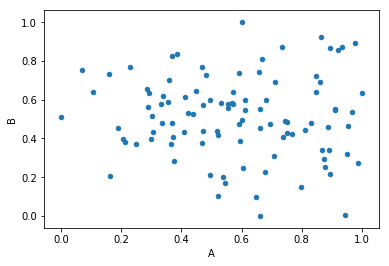

In [5]:
fig, ax = plt.subplots()

df.plot.scatter(x='A', y='B', ax=ax)
plt.show()

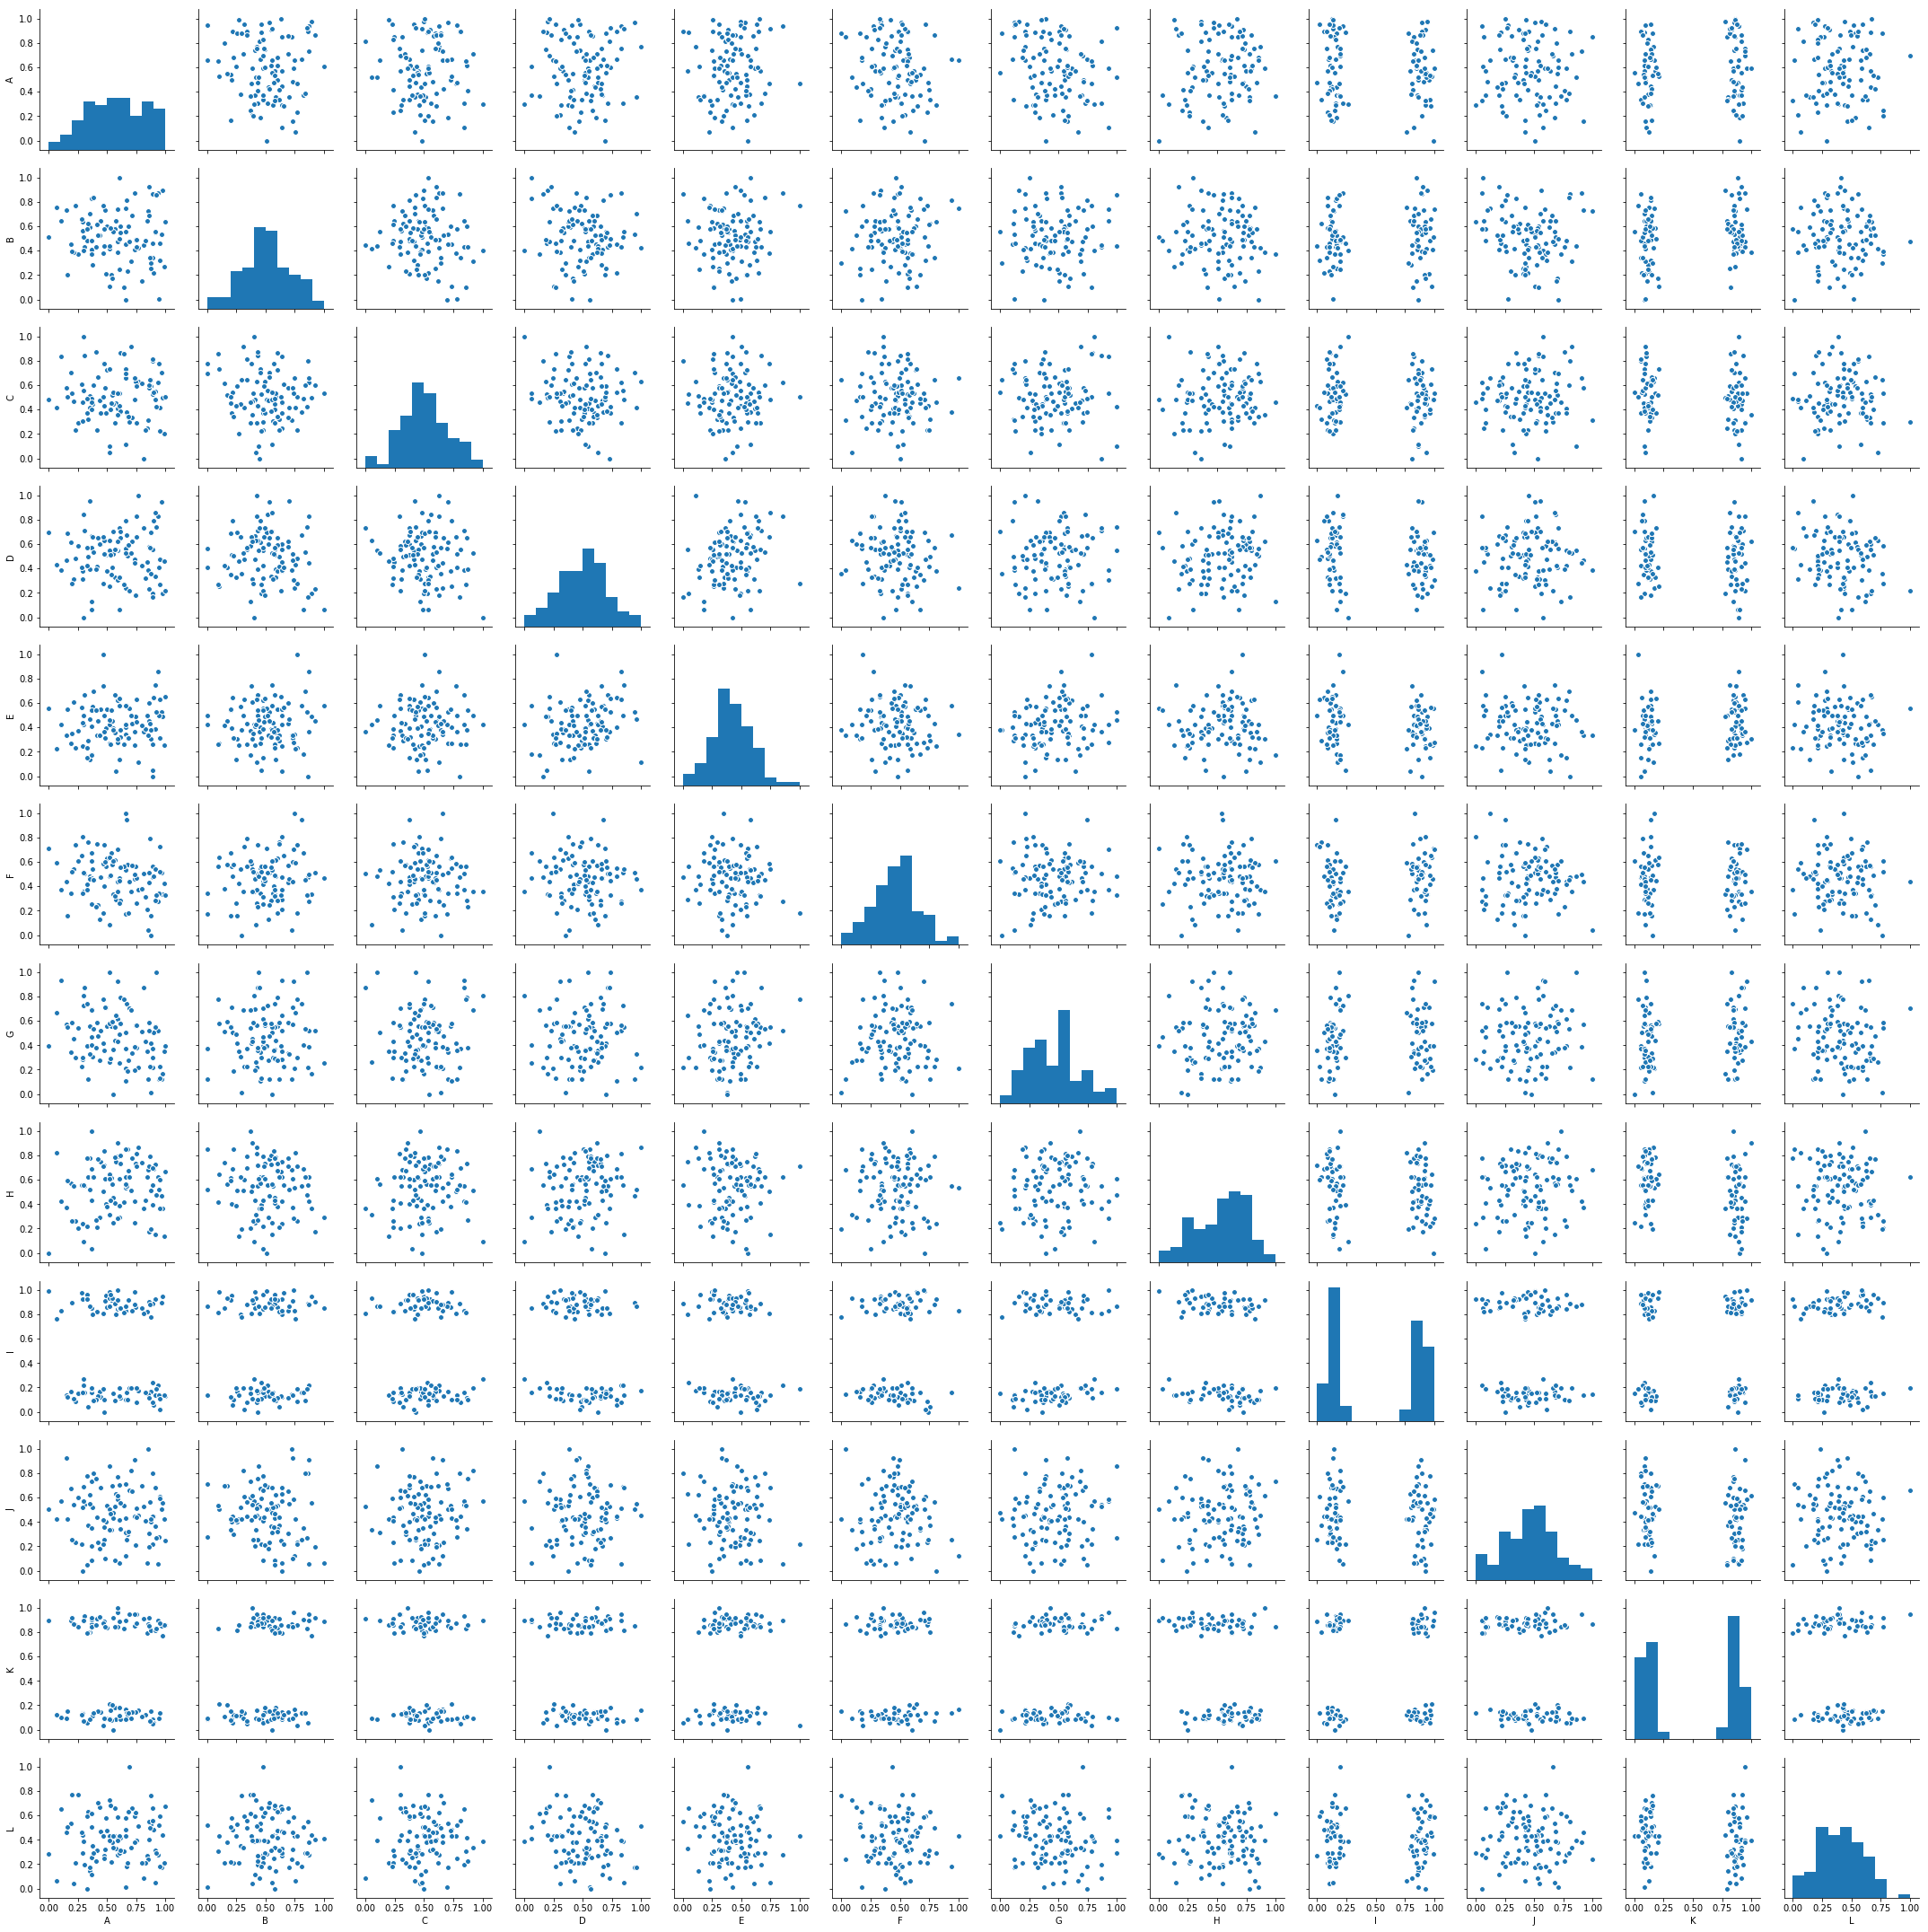

In [6]:
import seaborn as sns
relative_pic = sns.pairplot(df, vars = ['A','B','C','D','E','F','G','H','I','J','K','L'])
plt.show()

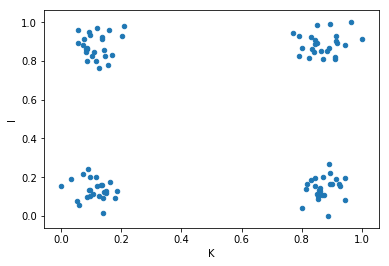

In [7]:
fig, ax = plt.subplots()

df.plot.scatter(x='K', y='I', ax=ax)
plt.show()

## scipy.cluster.hierarchy.dendrogramによるデンドグラムのプロット

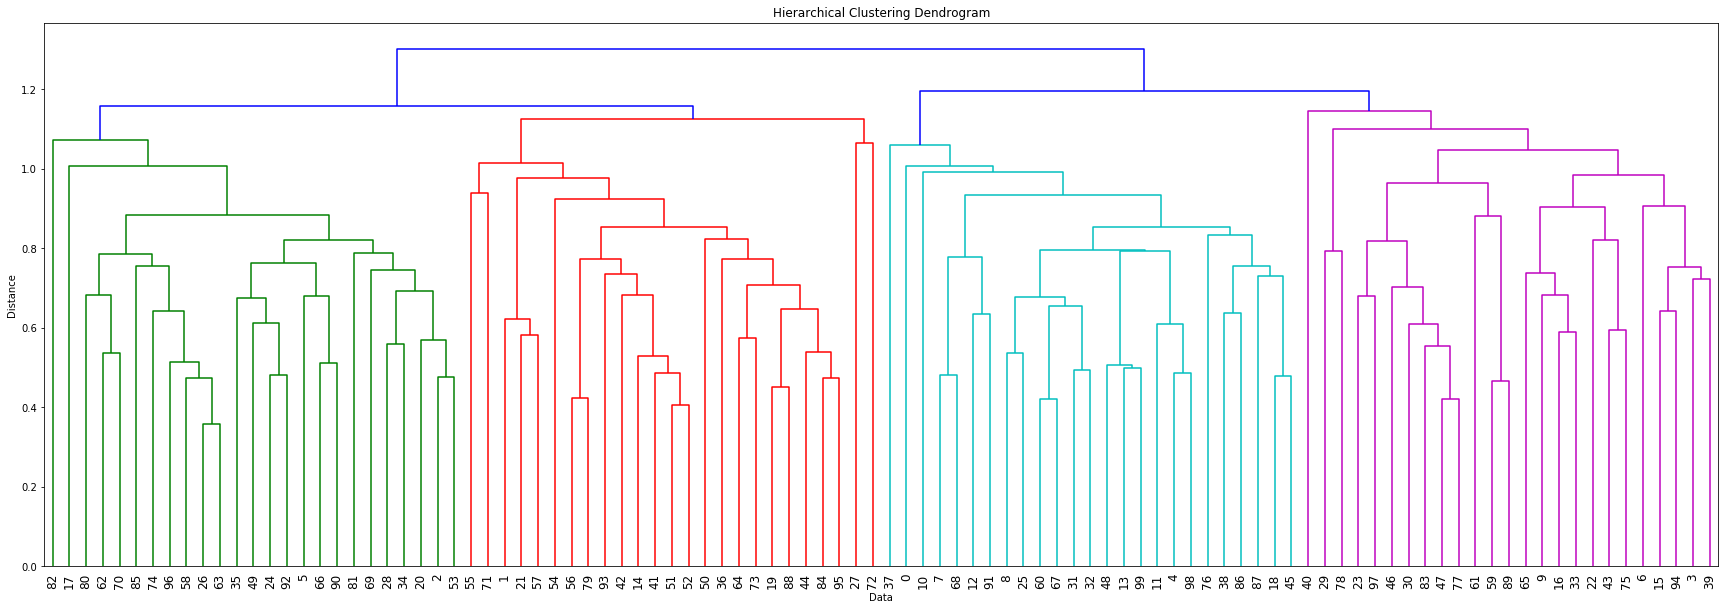

In [8]:
Z = linkage(df,'average')

plt.figure(figsize=(30, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data')
plt.ylabel('Distance')
dendrogram(
    Z,
    #p=4,
    #truncate_mode='lastp',
    labels=df.index.get_values(),
    leaf_font_size=12,
    color_threshold = 1.15 
)
plt.show()

## sklearn.decomposition.PCAによる主成分1と2の抽出，主成分1と2空間上の散布図のプロット，及び散布図における各クラスタの可視化（彩色）

## scipy.cluster.hierarchy.fclusterによるクラスタの抽出

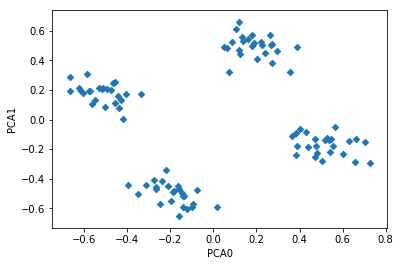

In [9]:
pca = PCA(2)
pca.fit(df)
df_pca = pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(2)], index=df.index)

fig, ax = plt.subplots()
df_pca.plot.scatter(x='PCA0', y='PCA1', marker='D', ax=ax)
plt.show()

[3 2 1 4 3 1 4 3 3 4 3 3 3 3 2 4 4 1 3 2 1 2 4 4 1 3 1 2 1 4 4 3 3 4 1 1 2
 3 3 4 4 2 2 4 2 3 4 4 3 1 2 2 2 1 2 2 2 2 1 4 3 4 1 1 2 4 1 3 3 1 1 2 2 2
 1 4 3 4 4 2 1 1 1 4 2 1 3 3 2 4 1 3 1 2 4 2 1 4 3 3]


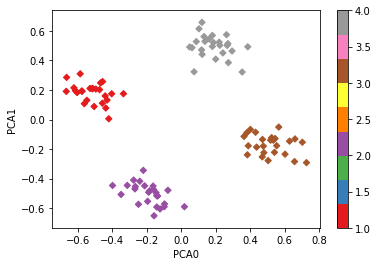

In [10]:
fig, ax = plt.subplots()
k = 4 
clusters = fcluster(Z, k, criterion='maxclust')
print(clusters)

df_pca.plot.scatter(x='PCA0', y='PCA1', c=clusters, cmap='Set1', marker='D', ax=ax)
plt.show()

# 以上